In [0]:
import matplotlib.pyplot as plt

In [0]:
import pandas as pd

In [0]:
from sklearn.metrics import accuracy_score

# Reading Train-Test zip files from google drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!unzip "/content/gdrive/My Drive/level_2_train.zip"

Archive:  /content/gdrive/My Drive/level_2_train.zip
replace level_2/background/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
!unzip "/content/gdrive/My Drive/level_2_test.zip"

# Convert and store each images as dictionary {index:array}

In [0]:
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip

     | 481kB 8.8MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-ycbllolu/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
fastai 1.0.46 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


In [0]:
from tqdm import tqdm_notebook

Understand 2

In [0]:
for i in tqdm_notebook(range(10000000), total=10000000, unit="epoch"):
  x=10000
  y=x*x*x*x*x

/usr/local/lib/python3.6/dist-packages/tqdm/_tqdm_notebook.py:88: TqdmExperimentalWarning: Detect Google Colab 0.0.1a2 and thus load dummy ipywidgets package. Note that UI is different from that in Jupyter. See https://github.com/tqdm/tqdm/pull/640
  " See https://github.com/tqdm/tqdm/pull/640".format(colab.__version__), TqdmExperimentalWarning)


----------------------------------------------------------------------------------------------------------------------

In [0]:
from PIL import Image, ImageFilter
import numpy as np

Understand 1

In [0]:
img= Image.open('index.png')
image_a=np.array(img)          #rows, columns, color channels)
print(image_a[0,0])       # there are 200 rows, 400 columns and each A[i,j] contains [height,width,color]
print(image_a.shape)

------------------------------------------------------------------------------------------------------

In [0]:
import os

In [0]:
def read_all(folder_path,key_prefix=""):
  
  print("reading:")
  
  images={}
  
  files = sorted(os.listdir(folder_path))    # os.listdir is an os independent function that Return a list containing the names of the entries in the directory given by path.
  
  for i,file_name in tqdm_notebook(enumerate(files), total=len(files)):   # enumerate adds a numerical index to files
    print(file_name)
    file_path = os.path.join(folder_path,file_name)   #dataset_train/level_1/background/0.jpg
    
    image_index = key_prefix+file_name[:-4]  #bgr_0
    
    image = Image.open(file_path)
    
    image = image.convert("L") # L mode for black and white
    
    images[image_index] = np.array(image.copy()).flatten()    # Explained in Understand 1
    # copy duplicates the image, so that the original one is retained
    #flatten in a 1d array
    
    image.close() # closes the file pointer Closes the file pointer, if possible. This operation will destroy the image core and release its memory. The image data will be unusable afterward.
    # anyways, a copy of each image is stored in dictionary, so we dont need
  #print(type(images))
  return images

In [0]:
languages = ['ta','hi','en']

images_train = read_all("level_2/background", key_prefix='bgr_')

print(type(images_train))

for language in languages:
  
  images_train.update(read_all("level_2/"+language,key_prefix=language+"_"))

print(len(images_train))

reading:


0.jpg
0_d2.jpg
0_d3.jpg
1.jpg
10.jpg
100.jpg
100_d2.jpg
100_d3.jpg
101.jpg
101_d2.jpg
101_d3.jpg
102.jpg
102_d2.jpg
102_d3.jpg
103.jpg
103_d2.jpg
103_d3.jpg
104.jpg
104_d2.jpg
104_d3.jpg
105.jpg
105_d2.jpg
105_d3.jpg
106.jpg
106_d2.jpg
106_d3.jpg
107.jpg
107_d2.jpg
107_d3.jpg
108.jpg
108_d2.jpg
108_d3.jpg
109.jpg
109_d2.jpg
109_d3.jpg
10_d2.jpg
10_d3.jpg
11.jpg
110.jpg
110_d2.jpg
110_d3.jpg
111.jpg
111_d2.jpg
111_d3.jpg
112.jpg
112_d2.jpg
112_d3.jpg
113.jpg
113_d2.jpg
113_d3.jpg
114.jpg
114_d2.jpg
114_d3.jpg
115.jpg
115_d2.jpg
115_d3.jpg
116.jpg
116_d2.jpg
116_d3.jpg
117.jpg
117_d2.jpg
117_d3.jpg
118.jpg
118_d2.jpg
118_d3.jpg
119.jpg
119_d2.jpg
119_d3.jpg
11_d2.jpg
11_d3.jpg
12.jpg
120.jpg
120_d2.jpg
120_d3.jpg
121.jpg
121_d2.jpg
121_d3.jpg
122.jpg
122_d2.jpg
122_d3.jpg
123.jpg
123_d2.jpg
123_d3.jpg
124.jpg
124_d2.jpg
124_d3.jpg
125.jpg
125_d2.jpg
125_d3.jpg
126.jpg
126_d2.jpg
126_d3.jpg
127.jpg
127_d2.jpg
127_d3.jpg
128.jpg
128_d2.jpg
128_d3.jpg
129.jpg
129_d2.jpg
129_d3.jpg
12_d2.jpg

c0_43.jpg
c10_129.jpg
c10_131.jpg
c12_25.jpg
c12_54.jpg
c12_71.jpg
c13_135.jpg
c13_2.jpg
c13_60.jpg
c14_68.jpg
c15_29.jpg
c15_42.jpg
c15_91.jpg
c16_1.jpg
c17_21.jpg
c18_24.jpg
c19_19.jpg
c19_55.jpg
c1_81.jpg
c20_47.jpg
c21_36.jpg
c22_125.jpg
c22_57.jpg
c23_79.jpg
c25_58.jpg
c26_27.jpg
c27_120.jpg
c27_46.jpg
c28_113.jpg
c29_6.jpg
c2_13.jpg
c2_69.jpg
c30_121.jpg
c30_127.jpg
c31_16.jpg
c32_132.jpg
c32_138.jpg
c32_144.jpg
c33_104.jpg
c33_88.jpg
c34_37.jpg
c35_112.jpg
c36_64.jpg
c37_141.jpg
c37_17.jpg
c38_45.jpg
c39_123.jpg
c39_134.jpg
c41_99.jpg
c44_140.jpg
c44_59.jpg
c45_20.jpg
c45_32.jpg
c46_108.jpg
c46_110.jpg
c46_52.jpg
c47_53.jpg
c47_65.jpg
c47_94.jpg
c48_145.jpg
c49_3.jpg
c49_31.jpg
c4_77.jpg
c50_107.jpg
c50_139.jpg
c51_23.jpg
c51_49.jpg
c51_62.jpg
c53_70.jpg
c53_93.jpg
c54_122.jpg
c54_18.jpg
c54_75.jpg
c55_4.jpg
c55_66.jpg
c56_100.jpg
c57_117.jpg
c57_118.jpg
c57_89.jpg
c58_133.jpg
c58_5.jpg
c59_128.jpg
c59_15.jpg
c59_38.jpg
c59_50.jpg
c59_80.jpg
c5_30.jpg
c5_74.jpg
c61_61.jpg
c62_11

c0_110.jpg
c0_12.jpg
c0_39.jpg
c0_65.jpg
c0_66.jpg
c0_68.jpg
c0_69.jpg
c0_84.jpg
c10_13.jpg
c10_133.jpg
c10_139.jpg
c10_47.jpg
c10_60.jpg
c10_63.jpg
c10_80.jpg
c10_90.jpg
c10_97.jpg
c10_99.jpg
c11_10.jpg
c11_114.jpg
c11_132.jpg
c11_146.jpg
c11_2.jpg
c11_27.jpg
c11_33.jpg
c11_49.jpg
c11_5.jpg
c11_53.jpg
c11_56.jpg
c11_72.jpg
c11_95.jpg
c11_96.jpg
c1_102.jpg
c1_107.jpg
c1_122.jpg
c1_123.jpg
c1_127.jpg
c1_129.jpg
c1_14.jpg
c1_141.jpg
c1_148.jpg
c1_149.jpg
c1_23.jpg
c1_30.jpg
c1_35.jpg
c1_85.jpg
c2_103.jpg
c2_118.jpg
c2_134.jpg
c2_137.jpg
c2_138.jpg
c2_142.jpg
c2_36.jpg
c2_61.jpg
c2_67.jpg
c2_70.jpg
c2_89.jpg
c2_9.jpg
c2_94.jpg
c2_98.jpg
c3_105.jpg
c3_109.jpg
c3_11.jpg
c3_119.jpg
c3_124.jpg
c3_19.jpg
c3_20.jpg
c3_54.jpg
c3_55.jpg
c3_59.jpg
c3_62.jpg
c3_7.jpg
c3_77.jpg
c3_86.jpg
c4_120.jpg
c4_121.jpg
c4_125.jpg
c4_16.jpg
c4_31.jpg
c4_34.jpg
c4_44.jpg
c4_48.jpg
c4_81.jpg
c4_87.jpg
c4_93.jpg
c5_108.jpg
c5_111.jpg
c5_126.jpg
c5_140.jpg
c5_26.jpg
c5_29.jpg
c5_3.jpg
c5_4.jpg
c5_45.jpg
c5_46.jpg


c10_139.jpg
c10_30.jpg
c10_41.jpg
c11_108.jpg
c11_56.jpg
c11_95.jpg
c12_113.jpg
c12_119.jpg
c12_133.jpg
c13_121.jpg
c13_78.jpg
c14_11.jpg
c14_148.jpg
c14_37.jpg
c14_38.jpg
c14_71.jpg
c15_123.jpg
c15_140.jpg
c15_7.jpg
c15_74.jpg
c16_0.jpg
c16_132.jpg
c16_6.jpg
c17_17.jpg
c18_130.jpg
c18_145.jpg
c18_33.jpg
c19_135.jpg
c1_51.jpg
c1_84.jpg
c1_88.jpg
c1_94.jpg
c20_109.jpg
c21_114.jpg
c21_19.jpg
c21_67.jpg
c21_96.jpg
c22_120.jpg
c22_128.jpg
c22_15.jpg
c22_23.jpg
c22_42.jpg
c22_9.jpg
c23_22.jpg
c23_98.jpg
c24_79.jpg
c24_86.jpg
c25_104.jpg
c25_107.jpg
c25_16.jpg
c25_31.jpg
c25_40.jpg
c25_45.jpg
c25_52.jpg
c26_102.jpg
c26_24.jpg
c26_5.jpg
c27_44.jpg
c27_69.jpg
c28_125.jpg
c28_47.jpg
c29_60.jpg
c2_83.jpg
c30_13.jpg
c30_136.jpg
c30_28.jpg
c30_50.jpg
c31_101.jpg
c31_49.jpg
c32_127.jpg
c32_137.jpg
c32_53.jpg
c33_117.jpg
c34_103.jpg
c34_144.jpg
c34_65.jpg
c35_116.jpg
c35_77.jpg
c35_80.jpg
c36_122.jpg
c36_147.jpg
c36_18.jpg
c37_10.jpg
c37_2.jpg
c37_4.jpg
c37_66.jpg
c38_34.jpg
c38_54.jpg
c38_58.jpg
c3

In [0]:
list(images_train.keys())[:5]

['bgr_0', 'bgr_0_d2', 'bgr_0_d3', 'bgr_1', 'bgr_10']

In [0]:
images_test = read_all("kaggle_level_2",key_prefix='')
print(len(images_test))

reading:


0.jpg
1.jpg
10.jpg
100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
105.jpg
106.jpg
107.jpg
108.jpg
109.jpg
11.jpg
110.jpg
111.jpg
112.jpg
113.jpg
114.jpg
115.jpg
116.jpg
117.jpg
118.jpg
119.jpg
12.jpg
120.jpg
121.jpg
122.jpg
123.jpg
124.jpg
125.jpg
126.jpg
127.jpg
128.jpg
129.jpg
13.jpg
130.jpg
131.jpg
132.jpg
133.jpg
134.jpg
135.jpg
136.jpg
137.jpg
138.jpg
139.jpg
14.jpg
140.jpg
141.jpg
142.jpg
143.jpg
144.jpg
145.jpg
146.jpg
147.jpg
148.jpg
149.jpg
15.jpg
150.jpg
151.jpg
152.jpg
153.jpg
154.jpg
155.jpg
156.jpg
157.jpg
158.jpg
159.jpg
16.jpg
160.jpg
161.jpg
162.jpg
163.jpg
164.jpg
165.jpg
166.jpg
167.jpg
168.jpg
169.jpg
17.jpg
170.jpg
171.jpg
172.jpg
173.jpg
174.jpg
175.jpg
176.jpg
177.jpg
178.jpg
179.jpg
18.jpg
180.jpg
181.jpg
182.jpg
183.jpg
184.jpg
185.jpg
186.jpg
187.jpg
188.jpg
189.jpg
19.jpg
190.jpg
191.jpg
192.jpg
193.jpg
194.jpg
195.jpg
196.jpg
197.jpg
198.jpg
199.jpg
2.jpg
20.jpg
200.jpg
201.jpg
202.jpg
203.jpg
204.jpg
205.jpg
206.jpg
207.jpg
208.jpg
209.jpg
21.jpg
210.jpg
211.jpg
21

In [0]:
list(images_test.keys())[:5]

['0', '1', '10', '100', '101']

In [0]:
X_train=[]
Y_train=[]

for key,value in images_train.items():
  
  X_train.append(value)
  if key[:4] == "bgr_" :   # creating Output
    Y_train.append(0)            # set y=0 if its a blank image( bgr images are all blank)
  else:
    Y_train.append(1)

ID_test = []
X_test = []

for key,values in images_test.items():
    
  ID_test.append(int(key))
  print(key)
  X_test.append(values)
  
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)

print(X_train.shape,Y_train.shape)   #(900, 256) (900,)
print(X_test.shape)   #(300, 256)    why 256?  see Understand 3

Understand 3

Each primary color gets 8 bits, or one byte, in the color representation to describe how much of it there is in the color.

8 bits or one byte can store a number between 0 and 255, and no more than that. 255 is the largest number you can store in 8 bits. represented as 11111111 binary or FF hexadecimal.

-----------------------------------------------------------------------------------------------------------------------

In [0]:
print(X_train)

[[247  64  51 ... 118 124  81]
 [247  64  51 ... 118 124  81]
 [247  64  51 ... 118 124  81]
 ...
 [255 251 255 ... 255 255 255]
 [255 241 255 ... 255 255 255]
 [253 242 255 ... 255 255 255]]


In [0]:
print(X_test)

[[238 255  61 ... 255 229 254]
 [254 172 187 ...  12 220 134]
 [253 255  46 ... 255 254 243]
 ...
 [232  57 137 ... 102  75  17]
 [112 120 173 ... 148 255  55]
 [255 251 250 ... 227 244 255]]


# Standardization

In [0]:
from sklearn.preprocessing import StandardScaler  #Scaler  not scalar


scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [0]:
scaler = StandardScaler()

In [0]:
X_train_scaled = scaler.fit_transform(X_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
print(X_train_scaled)    #values got scaled to 0-1

[[ 0.72618722 -1.26566595 -1.47279991 ... -0.80809434 -0.69832135
  -1.42401119]
 [ 0.72618722 -1.26566595 -1.47279991 ... -0.80809434 -0.69832135
  -1.42401119]
 [ 0.72618722 -1.26566595 -1.47279991 ... -0.80809434 -0.69832135
  -1.42401119]
 ...
 [ 0.81973289  0.85414755  0.92246338 ...  0.85761996  0.85140077
   0.80382933]
 [ 0.81973289  0.74078854  0.92246338 ...  0.85761996  0.85140077
   0.80382933]
 [ 0.79634647  0.75212444  0.92246338 ...  0.85761996  0.85140077
   0.80382933]]


In [0]:
print(X_test_scaled)

[[ 0.62094835  0.89949115 -1.35538504 ...  0.85761996  0.54382233
   0.79102565]
 [ 0.80803968 -0.04138863  0.12404228 ... -2.09689518  0.43735287
  -0.74541609]
 [ 0.79634647  0.89949115 -1.53150734 ...  0.85761996  0.83957083
   0.65018515]
 ...
 [ 0.5507891  -1.34501726 -0.46303205 ... -1.00263031 -1.27798839
  -2.24344678]
 [-0.85239592 -0.63085549 -0.04033853 ... -0.44333938  0.85140077
  -1.7569069 ]
 [ 0.81973289  0.85414755  0.86375595 ...  0.517182    0.72127143
   0.80382933]]


# Sigmoid apply algorithm

In [0]:
 
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None


  def grad_w_mse(self, x,y):
    y_pred = self.sigmoid(x)
    #print(y_pred)
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  
  def grad_w_ce(self,x,y):
    y_pred = self.sigmoid(x)
    return (y_pred - y) * x


  def grad_b_mse(self,x,y):
    y_pred = self.sigmoid(x)
    return (y_pred - y) * y_pred * (1 - y_pred)  
 

  def grad_b_ce(self,x,y):
    y_pred = self.sigmoid(x)
    return (y_pred - y)

  def fit(self,X,Y, epochs=1, eta=1,loss_fn = "mse"):
    print("again")
    self.w=np.zeros(X.shape[1])
    self.b=0
    loss={}

    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw=0
      db=0
      for x,y in zip(X,Y):
        if loss_fn=="mse":
          dw += self.grad_w_mse(x,y)
          db += self.grad_b_mse(x,y)
        
        elif loss_fn=="ce":
          dw += self.grad_w_ce(x,y)
          db += self.grad_b_ce(x,y)
        

      self.w = self.w - eta*dw
      self.b = self.b - eta*db
      y_pred=self.sigmoid(X)
      
      if loss_fn == "mse":
        loss[i] = self.compute_loss_mse(Y,y_pred)
        if i==500 or i==600 or i==700 or i==800 or i==900 or i==1000 or i==1499 or i==1999 or i==2500 or i==3000 or i==3500 or i==3999 or i==4500 or i==4999 or i==5500 or i==5999 or i==6500 or i==6999 or i==7500 or i==7999 or i==8500 or i==8999 or i==9500 or i==9999:
          print(i, loss[i])

      elif loss_fn == "ce":
        loss[i] = self.compute_loss_ce(Y,y_pred)
        #print("here")
        if i==500 or i==600 or i==700 or i==800 or i==900 or i==1000 or i==1499 or i==1999 or i==2500 or i==3000 or i==3500 or i==3999 or i==4500 or i==4999 or i==5500 or i==5999 or i==6500 or i==6999 or i==7500 or i==7999 or i==8500 or i==8999 or i==9500 or i==9999:
          print(i, loss[i])
          
        #else:
         # print("did not reach 500 or 1000")

    plt.plot(loss.values(),'*')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    return self.w,self.b


  def sigmoid(self,X):
    return 1/(1 + np.exp(-(np.dot(X,self.w.T) + self.b)))


  def compute_loss_mse(self,Y,Y_pred):
    loss=0
    for y,yp in zip(Y,Y_pred):
      loss += np.power((y-yp),2)
    return loss/len(Y)

  def compute_loss_ce(self,Y,Y_pred):
    loss = 0
    for y,yp in zip(Y,Y_pred):
      loss += -1 * y * np.math.log(yp,2)
    return loss

In [0]:
sn = SigmoidNeuron()


again


500 0.008895912929986007
600 0.008890644316709868
700 0.008885181014219682
800 0.008816756259144812
900 0.006777219251962602
1000 0.005568353584707844
1499 0.005557965506103465
1999 0.005556956756723396
2500 0.005556557127216764
3000 0.005556340489454548
3500 0.0055562033167614764
3999 0.005556108415112726
4500 0.005556038312106293
4999 0.005555984707067695
5500 0.0055559420437003865
5999 0.00555590751253683
6500 0.005555878770669628
6999 0.005555854647784005
7500 0.005555833957681875
7999 0.005555816148318897
8500 0.005555800540212207
8999 0.005555786852201194
9500 0.0055557746588163655
9999 0.005555763810458196


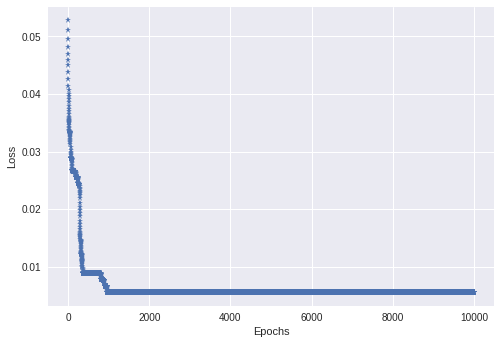

In [0]:
w,b = sn.fit(X_train_scaled,Y_train,epochs = 10001,eta = 0.01)

In [0]:
w,b = sn.fit(X_train_scaled,Y_train,epochs = 10001,eta = 0.01,loss_fn = "ce")

In [0]:
print(Y_train)

In [0]:
Y_pred=[]
print(w,b)
for x in X_train_scaled:
  Y_pred.append(sn.sigmoid(x))

In [0]:
y_pred = np.array(Y_pred)
print(y_pred)

In [0]:
print(X_test_scaled)

In [0]:
Y_pred_test=[]
#print(w,b)
for x in X_test_scaled:
  #print(x)
  Y_pred_test.append(sn.sigmoid(x))

Y_pred_test = np.array(Y_pred_test)
print(Y_pred_test)

In [0]:
Y_pred_test_binarised = list(map( lambda y: 0 if y<0.5 else 1, Y_pred_test))

In [0]:
print(Y_pred_test_binarised)

[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1]


def print_accuracy(sn):

  Y_pred_train = sn.predict(X_scaled_train)

Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)

print("Train Accuracy : ", accuracy_train)

print("-"*50)

In [0]:
def print_accuracy(X):
  Y_pred_train = sn.sigmoid(X)
  
  Y_pred_binarised_train = list(map( lambda y:0 if y<0.5 else 1, Y_pred_train))
  
  accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
  print("Train Accuracy :",accuracy_train)

In [0]:
print_accuracy(X_train_scaled)

Train Accuracy : 1.0


In [0]:
print_accuracy(X_train_scaled)

Train Accuracy : 1.0


Y_pred_test = sn_ce.predict(X_scaled_test)

Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()


submission = {}

submission['ImageId'] = ID_test

submission['Class'] = Y_pred_binarised_test


submission = pd.DataFrame(submission)

submission = submission[['ImageId', 'Class']]

submission = submission.sort_values(['ImageId'])

submission.to_csv("submisision.csv", index=False)

In [0]:
submission = {}
submission['ImageId'] = ID_test
submission['Class'] = Y_pred_test_binarised
submission = pd.DataFrame(submission)
submission = submission[['ImageId','Class']]
submission.to_csv("submission_Sigmoid_Text_NonText_2_first.csv",index=False)
#print(submission)

# MPNeuron

In [0]:
import pandas as pd

In [0]:
X_train_df=pd.DataFrame(X_train)


In [0]:
X_train_binarised_df = X_train_df.apply(pd.cut, bins=2, labels=[1,0])
Y_train_binarised = Y_train     # y is already binarised

In [0]:
print(X_train_binarised_df)

In [0]:
X_train_binarised = np.array(X_train_binarised_df)
# y is already an array

In [0]:
print(X_train_binarised)

[[0 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
b=0
max_accuracy=0
for i in range(X_train_binarised.shape[1]+1):
  accurate_rows=0
  for x,y in zip(X_train_binarised,Y_train_binarised):
    y_pred=(np.sum(x)>=i)
    if y_pred == y:
      accurate_rows+=1
  accuracy=(accurate_rows/X_train_binarised.shape[0])
  print(i,accuracy)

  #print(accuracy)
  if accuracy>max_accuracy:
    max_accuracy=accuracy
    b=i
    
print(b, max_accuracy)

In [0]:
X_test_df=pd.DataFrame(X_test)
X_test_binarised_df = X_test_df.apply(pd.cut, bins=2, labels=[1,0])


In [0]:
X_test_binarised = np.array(X_test_binarised_df)

In [0]:
b=3
y_test_mpn=[]
for x in zip(X_test_binarised):
  
  y_pred=int(np.sum(x)>=b)
  #print(np.sum(x),b, y_pred)
  y_test_mpn.append(y_pred)

In [0]:
submission = {}
submission['ImageId'] = ID_test
submission['Class'] = y_test_mpn
submission = pd.DataFrame(submission)
submission = submission[['ImageId','Class']]
submission.to_csv("submission_mpn_2_second.csv",index=False)
#print(submission)

# perceptron

In [0]:
w=np.zeros(X_train.shape[1])

In [0]:
class Perceptron:
  
  
  final_w = None
  final_b = None
  
  
  def fit(self,X,Y,b=0,lr=1,epochs=1):
    accuracy_list={}
    w=np.zeros(X.shape[1])
    max_accuracy=0
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      for x,y in zip(X,Y):

        y_pred=np.dot(x,w.T)

        if y_pred<b and y==1:
          w = w + x*lr
          b = b - 1*lr


        elif y_pred>=b and y==0:
          w = w - x*lr
          b = b + 1*lr



      y_train_pred = predict_train(X,w,b)


      accuracy=accuracy_score(Y_train,y_train_pred)
      #print(accuracy, w, b)
      accuracy_list[epoch]=accuracy

      if accuracy>max_accuracy:
        max_accuracy=accuracy
        self.final_b=b
        self.final_w=w

    plt.plot(accuracy_list.values(),'*')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()

    return max_accuracy
  
  
  
  
  def predict(self,X):
    
    y_pred=[]

    for x in X:

        y=int(np.dot(x,self.final_w.T)>=self.final_b)

        y_pred.append(y)
      
    return y_pred

  
def predict_train(X,w,b):
    
    y_pred=[]

    for x in X:

        y=int(np.dot(x,w.T)>=b)

        y_pred.append(y)
      
    return y_pred  
  

In [0]:
pr = Perceptron()

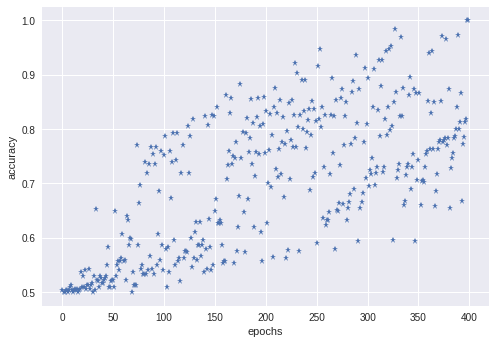

1.0


In [0]:
accuracy= pr.fit(X_train,Y_train,0,0.01,400)
print(accuracy)

In [0]:
Y_test_perceptron = pr.predict(X_test)

In [0]:
submission = {}
submission['ImageId'] = ID_test
submission['Class'] = Y_test_perceptron
submission = pd.DataFrame(submission)
submission = submission[['ImageId','Class']]
submission.to_csv("submission_perceptron_level_2_third.csv",index=False)
#print(submission)